r  remove (list = objects() ) Load add-on packages - deSolve - contains lsoda function - differential equation solver.



In [28]:
library (deSolve)

#### Function to compute derivatives of the differential equations

In [29]:
sis_model = function (current_timepoint, state_values, parameters)
{
  # create state variables (local variables)
  S = state_values [1]        # susceptibles
  I = state_values [2]        # infectious
  
  with ( 
    as.list (parameters),     # variable names within parameters can be used 
         {
           # compute derivatives
           dS = (-beta * S * I) + (gamma * I)
           dI = ( beta * S * I) - (gamma * I)
           
           # combine results
           results = c (dS, dI)
           list (results)
         }
    )
}


Parameters

In [30]:
contact_rate = 10                     # number of contacts per day
transmission_probability = 0.07       # transmission probability
infectious_period = 5                 # infectious period

Compute values of beta (transmission rate) and gamma (recovery rate)



In [31]:
beta_value = contact_rate * transmission_probability
gamma_value = 1 / infectious_period

#### Compute Ro.

In [32]:
Ro = beta_value / gamma_value

##### Disease dynamics parameters.

In [33]:
parameter_list = c (beta = beta_value, gamma = gamma_value)

#### Initial values for sub-populations.

In [34]:
X = 25000      # susceptible hosts
Y = 7           # infectious hosts

Compute total population.


In [35]:
N = X + Y 

In [36]:
# Initial state values for the differential equations.

initial_values = c (S = X/N, I = Y/N)


### Output timepoints.

In [37]:
timepoints = seq (0, 50, by=1)

### Simulate the SIS epidemic.

In [38]:
output = lsoda (initial_values, timepoints, sis_model, parameter_list)

#### Plot dynamics of Susceptibles sub-population.

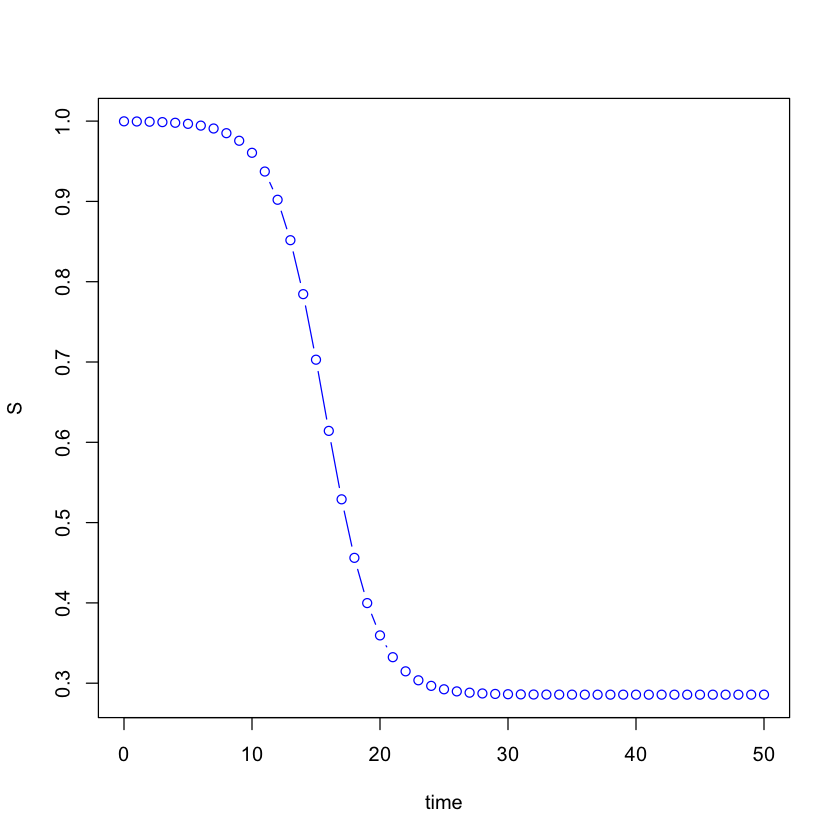

In [39]:
plot (S ~ time, data = output, type='b', col = 'blue')

#### Plot dynamics of Infectious sub-population.

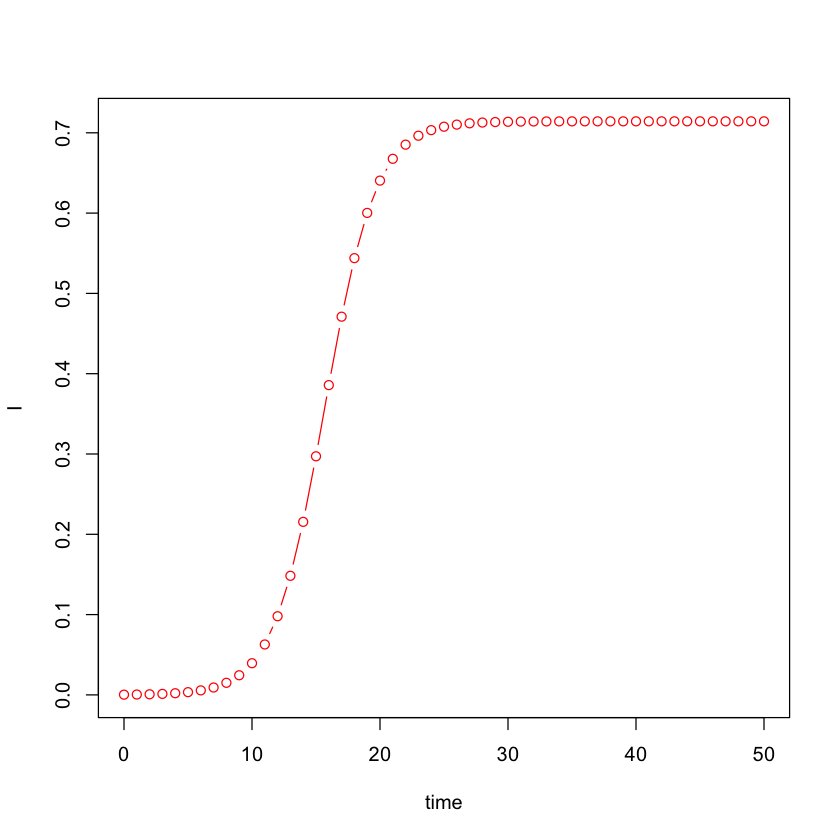

In [40]:
plot (I ~ time, data = output, type='b', col = 'red')

#### Plot dynamics of Susceptibles, Infectious and Recovered sub-populations in the same plot.


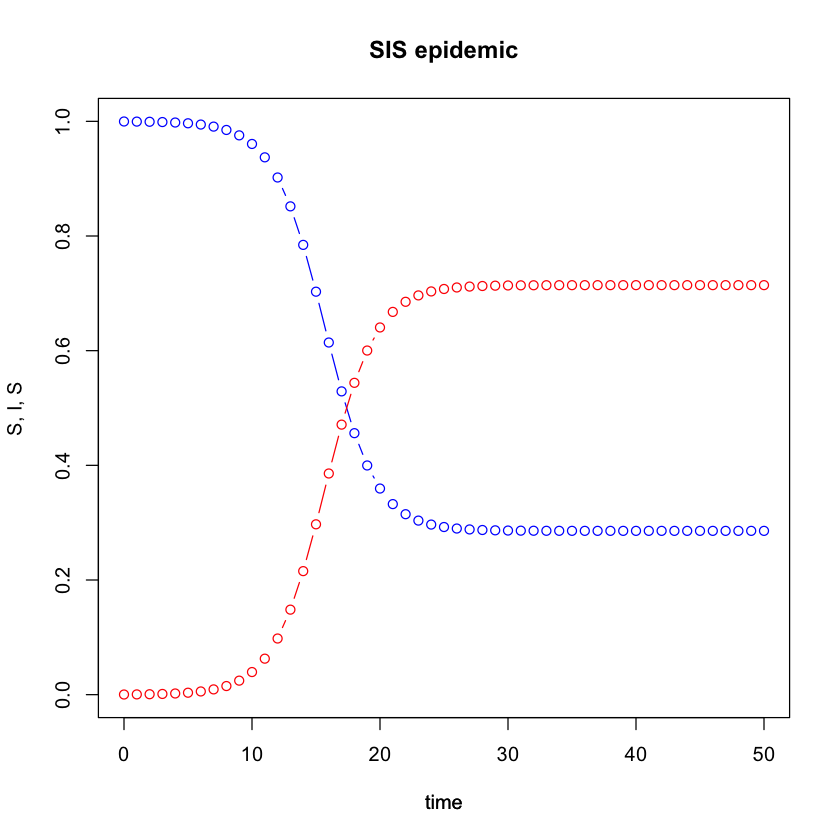

In [41]:
# susceptible hosts over time
plot (S ~ time, data = output, type='b', ylim = c(0,1), col = 'blue', ylab = 'S, I, S', main = 'SIS epidemic') 

# remain on same frame
par (new = TRUE)    

# infectious hosts over time
plot (I ~ time, data = output, type='b', ylim = c(0,1), col = 'red', ylab = '', axes = FALSE) 

In [42]:
# remain on same frame
par (new = TRUE)  

Warning message in par(new = TRUE):
“calling par(new=TRUE) with no plot”


In a SIS (Susceptible-Infectious-Susceptible) model, a susceptible individual can move into the infectious host group, then immediately return to the susceptible population. This model shows susceptible (blue) and infectious hosts (red) over time. As time increases, the two host populations invert and then level off, becoming parallel to one another. This model is most commonly seen with Rotavirus outbreaks.